# Normal Distribution

In [66]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

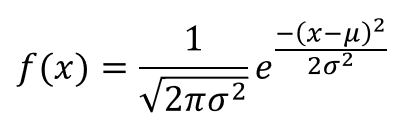

norm.pdf(x, loc=0, scale=1) Probability density function.

norm.cdf(x, loc=0, scale=1) Cumulative distribution function. (area to the left of x)

norm.sf(x, loc=0, scale=1) Survival function (also defined as 1 - cdf, but sf is sometimes more accurate). (Area to the right of x)

norm.ppf(q, loc=0, scale=1) Percent point function (inverse of cdf — percentiles). (Given the area gives the Z value on the left)

norm.isf(q, loc=0, scale=1) Inverse survival function (inverse of sf). (Given the area gives the Z-value on the right)

In [44]:
# PDF gives the P at a given x-value for given mean and std
x_values = np.linspace(-10, 11, num=100)
pdf_values = stats.norm.pdf(x_values, loc=0, scale=1)
pdf_values_1 = stats.norm.pdf(x_values, loc=0, scale=1.5)
pdf_values_2 = stats.norm.pdf(x_values, loc=0, scale=2)

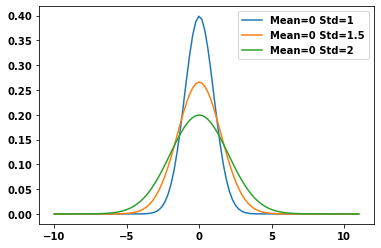

In [46]:
# Normal plots with different mean and std
sns.lineplot(x=x_values, y=pdf_values, label='Mean=0 Std=1')
sns.lineplot(x=x_values, y=pdf_values_1, label='Mean=0 Std=1.5')
sns.lineplot(x=x_values, y=pdf_values_2, label='Mean=0 Std=2')
plt.legend(loc='best')
plt.show()

In [48]:
# Area to the curve to the left of mean
stats.norm.cdf(x=0, loc=0, scale=1)

0.5

In [50]:
# Area to the left of 2-sigma Z-value for 2 tailed test
stats.norm.cdf(x=-1.96, loc=0, scale=1)

0.024997895148220435

In [59]:
# Area to the right of 2-sigma Z-value for 2 tailed test
# Similar to the CDF on the other side, mirror image
stats.norm.sf(x=1.96, loc=0, scale=1)

0.024997895148220435

In [58]:
# Given the Area of the curve to the left what is the Z-value for 2 tailed test
# Invesve to CDF (it takes Z-value and gives area), PPF take area and gives Z-value
stats.norm.ppf(q=0.025, loc=0, scale=1)

-1.9599639845400545

In [61]:
# Given the Area of the curve to the Right what is the Z-value for 2 tailed test
# Invesve to SF (it takes Z-value and gives area), ISF take area and gives Z-value
stats.norm.isf(q=0.025, loc=0, scale=1)

1.9599639845400545

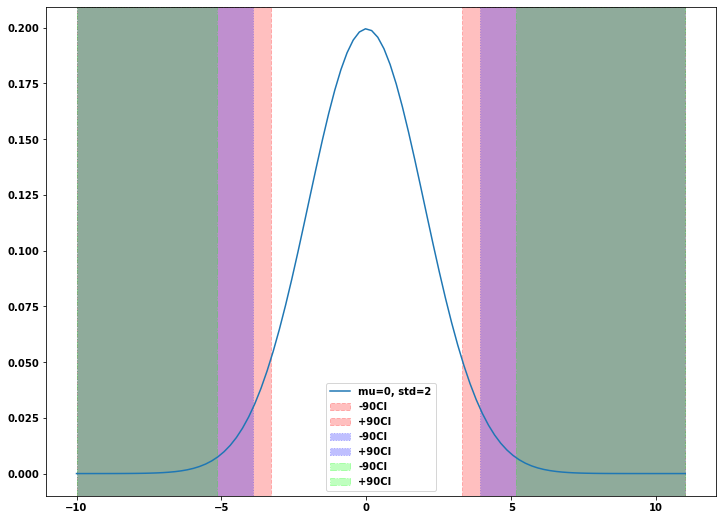

In [83]:
left_bound = -10
right_bound = 11
mean=0
std_val = 2

x_values = np.linspace(left_bound, right_bound, num=100)
pdf_values = stats.norm.pdf(x_values, loc=mean, scale=std_val)

# Plot the area with CI of 90%
# CI is 90, that means the area to the left is 5% and right is 5%, i.e., 0.05
area_90 = 0.05
left_z_90 = stats.norm.ppf(q=area_90, loc=mean, scale=std_val)
right_z_90 = stats.norm.isf(q=area_90, loc=mean, scale=std_val)
plt.figure(figsize=(12, 9))
sns.lineplot(x=x_values, y=pdf_values, label='mu=0, std=2')
plt.axvspan(xmin=left_bound, xmax=left_z_90, label='-90CI', color=[1, 0, 0, .25], linestyle='--') # axvline(x=left_z_90, label='-90CI', color=[1, 0, 0, .75], linestyle='--')
plt.axvspan(xmin=right_z_90, xmax=right_bound, label='+90CI', color=[1, 0, 0, .25], linestyle='--')

# Plot the area with CI of 95%
# CI is 90, that means the area to the left is 5% and right is 5%, i.e., 0.025
area_95 = 0.025
left_z_95 = stats.norm.ppf(q=area_95, loc=mean, scale=std_val)
right_z_95 = stats.norm.isf(q=area_95, loc=mean, scale=std_val)
plt.axvspan(xmin=left_bound, xmax=left_z_95, label='-90CI', color=[0, 0, 1, .25], linestyle=':') # axvline(x=left_z_90, label='-90CI', color=[1, 0, 0, .75], linestyle='--')
plt.axvspan(xmin=right_z_95, xmax=right_bound, label='+90CI', color=[0, 0, 1, .25], linestyle=':')

# Plot the area with CI of 99%
# CI is 90, that means the area to the left is 0.5% and right is 0.5%, i.e., 0.005
area_99 = 0.005
left_z_99 = stats.norm.ppf(q=area_99, loc=mean, scale=std_val)
right_z_99 = stats.norm.isf(q=area_99, loc=mean, scale=std_val)
plt.axvspan(xmin=left_bound, xmax=left_z_99, label='-90CI', color=[0, 1, 0, .25], linestyle='-.') # axvline(x=left_z_90, label='-90CI', color=[1, 0, 0, .75], linestyle='--')
plt.axvspan(xmin=right_z_99, xmax=right_bound, label='+90CI', color=[0, 1, 0, .25], linestyle='-.')

plt.legend(loc='best')
plt.show()


### Problem Statement

#### Question:
Perfume bottles are filled with the average volume of 150 cc and the standard deviation of 2 cc. 
* What percent of bottles will have the volume more than 153 cc?
* What percent of bottles will have the volume between 148 and 152 cc?


In [6]:
# Generating the normal data with mean = 150 and Std = 2
np.random.normal(loc=150, scale=2, size=10)

array([147.60865944, 146.39344137, 148.16643787, 153.42213516,
       151.4637616 , 150.02505148, 151.37651997, 149.40626506,
       150.88070889, 146.33533478])

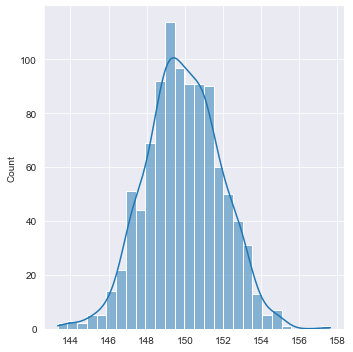

In [16]:
sns.set_style(style='darkgrid')
sns.displot(x=np.random.normal(loc=150, scale=2, size=1000), kind='hist', kde=True)
plt.show()

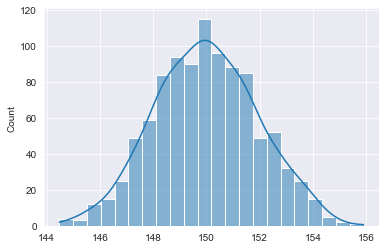

In [15]:
sns.set_style(style='darkgrid')
sns.histplot(x=np.random.normal(loc=150, scale=2, size=1000), kde=True)
plt.show()

[1. 1. 1. ... 1. 1. 1.]


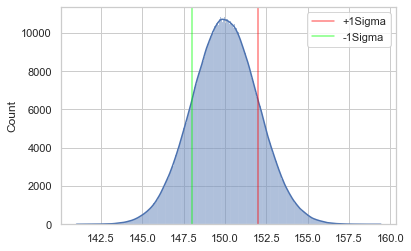

In [44]:
# Generating a larger sample and check for area under the curve 
# for a normal distribution
data_norm = np.random.normal(loc=150, scale=2, size=1000000)
sns.set_theme(style='whitegrid')
sns.histplot(x=data_norm, kde=True)
plt.axvline(x=152, color=[1,0,0,.5], label='+1Sigma')
plt.axvline(x=148, color=[0,1,0,.5], label='-1Sigma')
plt.legend(loc='best')
plt.show()

In [36]:
# Using scipy Survival Function (sf)
p_greater_153 = stats.norm.sf(x=153, loc=150, scale=2)
print(type(p_greater_153))
print(f"""
Percent of bottles will have the volume more than 153 cc is
{np.round(p_greater_153*100, decimals=2)}
""")


<class 'numpy.float64'>

Percent of bottles will have the volume more than 153 cc is
6.68



In [37]:
# Using scipy Survival Function (sf)
p_148_152 = stats.norm.sf(x=148, loc=150, scale=2) - stats.norm.sf(x=152, loc=150, scale=2)
print(f"""
Percent of bottles will have the volume between 148 and 152 cc
{np.round(p_148_152*100, decimals=2) }
""")


Percent of bottles will have the volume between 148 and 152 cc
68.27



In [38]:
# Using scipy CDF
p_lessthan_148 = stats.norm.cdf(x=148, loc=150, scale=2) 
p_lessthan_152 = stats.norm.cdf(x=152, loc=150, scale=2)
print(f"""
Percent of bottles will have the volume between 148 and 152 cc
{np.round((p_lessthan_152-p_lessthan_148) *100, decimals=2) }
""")


Percent of bottles will have the volume between 148 and 152 cc
68.27



#### Question
The mean weight of a morning breakfast cereal pack is 0.295 kg with a standard deviation of 0.025 kg. The random variable weight of the pack follows a normal distribution. 

a)What is the probability that the pack weighs less than 0.280 kg? 

b)What is the probability that the pack weighs more than 0.350 kg? 

c)What is the probability that the pack weighs between 0.260 kg to 0.340 kg? 

In [2]:
# given data
mu = 0.295
sd = 0.025

In [3]:
# a)What is the probability that the pack weighs less than 0.280 kg? 

In [4]:
# Approach1: Calculate the Z Value and then compute cdf
x_bar = 0.28
z = (x_bar - mu)/sd
print(z)
p_less28 = stats.norm.cdf(z)
print('the probability that the pack weighs less than 0.280 kg is {}'.format( p_less28))

-0.5999999999999983
the probability that the pack weighs less than 0.280 kg is 0.2742531177500741


In [5]:
# Appraoch2: Substitute the values directly into CDF

p_less28_direct = stats.norm.cdf(x_bar, loc=mu, scale=sd)
print('the probability that the pack weighs less than 0.280 kg is {}'.format( p_less28_direct))

the probability that the pack weighs less than 0.280 kg is 0.2742531177500741


In [6]:
# b)What is the probability that the pack weighs more than 0.350 kg? 
# p_more350 = 1 - p_less_than_350
x_bar = 0.350
p_more350 = 1 - stats.norm.cdf(x_bar, loc=mu, scale=sd)
print('the probability that the pack weighs more than 0.350 kg is {}'.format( p_more350))

the probability that the pack weighs more than 0.350 kg is 0.01390344751349859


In [7]:
# b)What is the probability that the pack weighs more than 0.350 kg? 
# p_more350_direct = 1 - p_less_than_350
x_bar = 0.350
p_more350_direct = stats.norm.sf(x=x_bar, loc=mu, scale=sd)
print('the probability that the pack weighs more than 0.350 kg is {}'.format( p_more350_direct))

the probability that the pack weighs more than 0.350 kg is 0.013903447513498616


In [14]:
# c)What is the probability that the pack weighs between 0.260 kg to 0.340 kg? 
x1_bar = 0.340
x2_bar = 0.260
p_between260_340 = stats.norm.cdf(x=x1_bar, loc=mu, scale=sd) - stats.norm.cdf(x=x2_bar, loc=mu, scale=sd)
print(f'the probability that the pack weighs between 0.260 kg to 0.340 kg is {p_between260_340:.10f}')

the probability that the pack weighs between 0.260 kg to 0.340 kg is 0.8833130217


In [21]:
# Probabilities between standard deviations of the mean
for i in range(1, 7):
    print('Probabilities of between {} standard deviations from the mean is: {}'.format(i, 
                                    stats.norm.cdf(i)-stats.norm.cdf(-i)))

Probabilities of between 1 standard deviations from the mean is: 0.6826894921370859
Probabilities of between 2 standard deviations from the mean is: 0.9544997361036416
Probabilities of between 3 standard deviations from the mean is: 0.9973002039367398
Probabilities of between 4 standard deviations from the mean is: 0.9999366575163338
Probabilities of between 5 standard deviations from the mean is: 0.9999994266968562
Probabilities of between 6 standard deviations from the mean is: 0.9999999980268246
